In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

/Users/augustinlobjoie/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Decision trees for classification
The aim is to predict wine quality

In [2]:
df = pd.read_csv("../data/PreProcessed/MixWine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_name
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#### The train data set is composed of all the features execpt the quality( which is the target) and the wine type

In [3]:
df_tree = df.copy()
X = df_tree.select_dtypes(include=['number']).drop(columns=['quality']) #data selection for the training
y = df_tree['quality']                      #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #split the data into test.train

In [4]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train) #creating the tree

y_pred = tree.predict(X_test) #prediction
accuracy_score(y_test, y_pred)

0.5846153846153846

In [5]:
tree.tree_.max_depth

23

##### By default Scikit learn will search for a good maximum depth for the tree. 
> Here the accuracy = 0.58461. At First sight it is not a great result. However, the k-means clustering had a 0.36 accuracy score. The tree seems more suited for tha type of data.

>Still, the tree model is not that suited for this data set. Also the tree has a maximum length of 23.

Here, we watch the accuracy score of the decision tree according to its maximu depth

In [6]:
acc_plt = []
for i in range(3,24):
    tree_i = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree_i.fit(X_train, y_train) #creating the tree
    y_pred_ = tree_i.predict(X_test) #prediction
    acc = accuracy_score(y_test, y_pred_)
    acc_plt.append(acc)
    print(f"accuracy for max_depth = {i} = {acc}")

accuracy for max_depth = 3 = 0.5423076923076923
accuracy for max_depth = 4 = 0.5446153846153846
accuracy for max_depth = 5 = 0.5292307692307693
accuracy for max_depth = 6 = 0.5261538461538462
accuracy for max_depth = 7 = 0.5330769230769231
accuracy for max_depth = 8 = 0.5376923076923077
accuracy for max_depth = 9 = 0.556923076923077
accuracy for max_depth = 10 = 0.5615384615384615
accuracy for max_depth = 11 = 0.5584615384615385
accuracy for max_depth = 12 = 0.5661538461538461
accuracy for max_depth = 13 = 0.5615384615384615
accuracy for max_depth = 14 = 0.563076923076923
accuracy for max_depth = 15 = 0.5638461538461539
accuracy for max_depth = 16 = 0.5676923076923077
accuracy for max_depth = 17 = 0.5761538461538461
accuracy for max_depth = 18 = 0.5753846153846154
accuracy for max_depth = 19 = 0.583076923076923
accuracy for max_depth = 20 = 0.5838461538461538
accuracy for max_depth = 21 = 0.583076923076923
accuracy for max_depth = 22 = 0.5915384615384616
accuracy for max_depth = 23 = 0

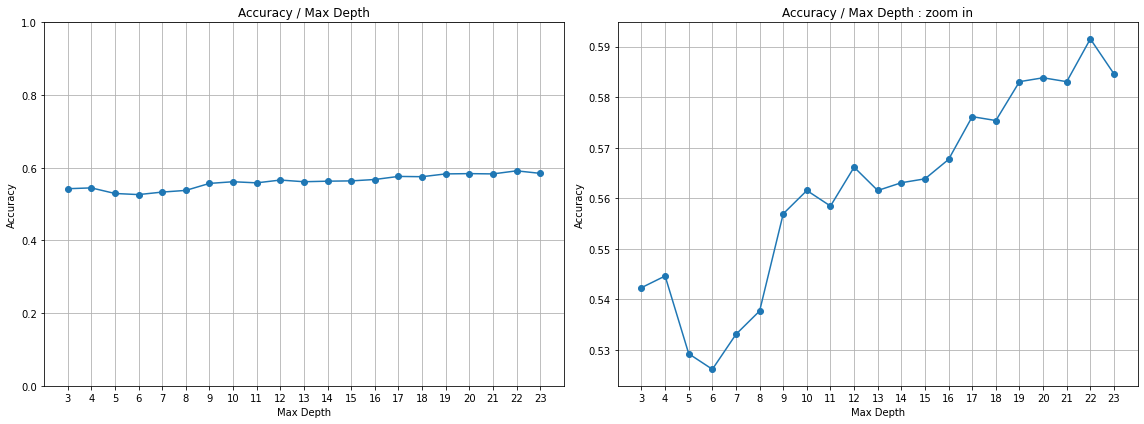

In [7]:
plt.figure(figsize = (16,6))
plt.subplot(122)
plt.plot(range(3, 24), acc_plt, marker='o')
plt.title('Accuracy / Max Depth : zoom in')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(3, 24, 1)) 

plt.subplot(121)
plt.plot(range(3, 24), acc_plt, marker='o')
plt.title('Accuracy / Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(3, 24, 1)) 
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

These plots show that the accuracy amelioration is not great from a maximum depth of 3 to a max depth of 23. 
With a maximum depth of 3 we have a 54% accuracy, while with 23 we have 58%. The step is not great for such a different complexity.  
> The model needs some pruning. 

> Even with pruning and the accuracy increase compared to unsupervised methods, tree can't predict with a great accuracy the wine quality

## What about a random forest

A random forest creates a certain number of trees : as a swarm, each member is not a great model but together they can give great results

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [27]:
rfc = RandomForestClassifier(n_estimators=10, random_state=1, max_depth=10) #random forest with 10 trees 
                                                                            #each with a max depth of 10

In [28]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=1)

In [35]:
y_pred = rfc.predict(X_test)
accuracy = rfc.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy : {accuracy}")

Precision: 0.6159796820145874
Recall: 0.6261538461538462
F1 Score: 0.6068395053716658
Accuracy : 0.6261538461538462


With max_depth = 10 : <br>
Accuracy with 1 tree: 0.5615384615384615 <br>
Accuracy with 10 trees : 0.6261538461538462 <br>
Accuracy with 100 trees: 0.6338461538461538 <br>
Accuracy with 1000 trees: 0.6346153846153846 <br>

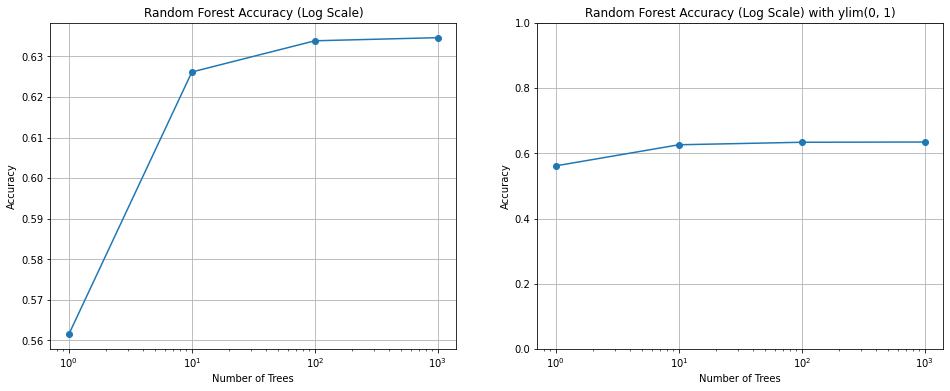

In [16]:
num_trees = [1, 10, 100, 1000]
accuracies = [0.5615384615384615, 0.6261538461538462, 0.6338461538461538, 0.6346153846153846]

plt.figure(figsize = (16,6))
plt.subplot(121)
plt.plot(num_trees, accuracies, marker='o')
plt.title('Random Forest Accuracy (Log Scale)')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid(True)

plt.subplot(122)
plt.plot(num_trees, accuracies, marker='o')
plt.title('Random Forest Accuracy (Log Scale) with ylim(0, 1)')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xscale('log') 
plt.ylim(0, 1) 
plt.grid(True)

plt.show()

### Conclusion on trees and forest
> Forest give indeed a better accuracy than a single more complex tree

> The forest do not increase the accuracy significantly. With 1 tree accuracy = 0.56, with 10 trees = 0.626. Then the accuracy stagnates even with 10 times trees again and again.

> The decison tree model reached its limit with this data set : the supervised aspect of it allows to get to 0.6 accuracy compared to less than 0.4 for the clustering. 

### With another target
A casual wine drinker could be more interested in knowing if the wine has a really high, really low or mid quality.
Here we work with the same dataa set but another target : quality 3 & 4 = bad = 0 ; quality 5, 6 & 7 = mid = 1 ; quality 8 & 9 = high = 0.

In [17]:
df_tree2 = df.copy()
X2 = df_tree2.select_dtypes(include=['number']).drop(columns=['quality']) #data
y2 = df_tree2['quality']                      #target
y2 = y2.replace({3: 0, 4: 0, 5: 1, 6: 1, 7: 1, 8: 2, 9: 2})
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=1)

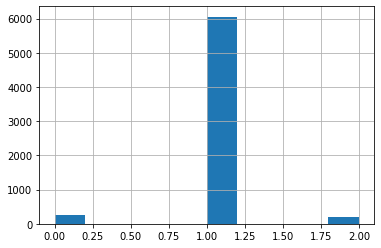

In [18]:
plt.figure()
y2.hist()
plt.show()

In [19]:
tree2 = DecisionTreeClassifier(random_state=1)
tree2.fit(X_train2, y_train2) #creating the tree

y_pred2 = tree2.predict(X_test2) #prediction
accuracy_score(y_test2, y_pred2)

0.5846153846153846

We obtained the exact same accuracy for the first taget. For a single tree, changing the target didn't increase the qality

In [20]:
max_d = 0
index = 0
for i in range(1,4):
    tree_i2 = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree_i2.fit(X_train, y_train) #creating the tree
    y_pred_2 = tree_i2.predict(X_test) #prediction
    acc2 = accuracy_score(y_test, y_pred_2)
    if(acc2 > max_d):
        max_d = acc2
        index = i
    print(f"accuracy for max_depth = {i} = {acc2}")

accuracy for max_depth = 1 = 0.4976923076923077
accuracy for max_depth = 2 = 0.5346153846153846
accuracy for max_depth = 3 = 0.5423076923076923


In [21]:
index, max_d

(3, 0.5423076923076923)

In [23]:
np.unique(y_pred2, return_counts=True)

(array([3, 4, 5, 6, 7, 8, 9]), array([  7,  44, 456, 556, 207,  29,   1]))

In [24]:
rfc2 = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=3) #random forest with 10 trees
rfc2.fit(X_train, y_train)
accuracy2 = rfc2.score(X_test, y_test)
print(f"Accuracy : {accuracy2}")

Accuracy : 0.5384615384615384


Changing the target seemed like a good idea, but it turned out not to be. The accuracy is 0.538 with 100 trees and 0.54 with 1000 trees. 
> It is now evident that the data with a specific quality lack sufficient distinct or appropriate feature values to predict the quality accurately, whether using a single decision tree or a forest.

> If the max legnth is not provided, the tree seems to overfit and stil has an accuracy that's only 9% better than a tree with a max length of 3 (max 3 vs 23).

### A wine quality can depend on the wine composition, but very different set of compositon can lead to the same quality. Further more, there are other parameters for the wine quality. As none expert we don't know them, also some can't be put in numbers. We can only see that to obtain a great quality, it takes more than a specific chimical composition.